In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

url = 'https://geo.datav.aliyun.com/areas_v3/bound/100000_full.json'
gdf = gpd.read_file(url)
gdf.to_crs('EPSG:4326')

,adcode,name,adchar,childrenNum,level,parent,subFeatureIndex,geometry
0,110000,北京市,None,16.0,province,{'adcode': 100000},0.0,"MULTIPOLYGON (((117.34861 40.58114, 117.38988 ..."
1,120000,天津市,None,16.0,province,{'adcode': 100000},1.0,"MULTIPOLYGON (((117.76560 39.40053, 117.84691 ..."
2,130000,河北省,None,11.0,province,{'adcode': 100000},2.0,"MULTIPOLYGON (((117.46749 40.64974, 117.41267 ..."
3,140000,山西省,None,11.0,province,{'adcode': 100000},3.0,"MULTIPOLYGON (((110.37926 34.60061, 110.42484 ..."
4,150000,内蒙古自治区,None,12.0,province,{'adcode': 100000},4.0,"POLYGON ((97.17290 42.79526, 97.37123 42.45708..."
5,210000,辽宁省,None,14.0,province,{'adcode': 100000},5.0,"MULTIPOLYGON (((123.53449 39.78836, 123.54681 ..."
6,220000,吉林省,None,9.0,province,{'adcode': 100000},6.0,"MULTIPOLYGON (((129.60149 42.41512, 129.60149 ..."
7,230000,黑龙江省,None,13.0,province,{'adcode': 100000},7.0,"MULTIPOLYGON (((123.56960 46.22382, 123.60471 ..."
8,310000,上海市,None,16.0,province,{'adcode': 100000},8.0,"MULTIPOLYGON (((120.90135 31.01733, 120.94015 ..."
9,320000,江苏省,None,13.0,province,{'adcode': 100000},9.0,"MULTIPOLYGON (((117.31165 34.56169, 117.27285 ..."


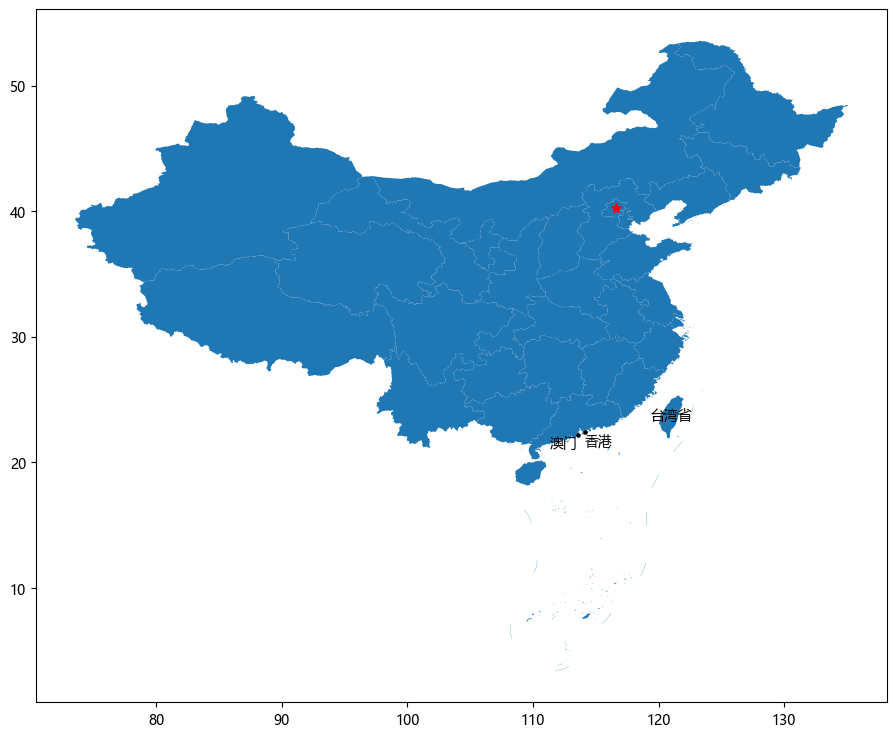

In [14]:
#临时设置支持中文的字体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 设置字体为微软雅黑
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号
# 创建画布
fig, ax = plt.subplots(figsize=(12, 9))
# 绘制主要区域
ax = gdf.plot(ax=ax)
ax = gdf[gdf.name=="北京市"].representative_point().plot(ax=ax, facecolor='red',marker='*', markersize=50) 


def plot_special_areas(gdf):
    # 定义特殊行政区域的adcode列表
    special_areas_adcode = ['710000', '810000', '820000']
    
    # 遍历GeoDataFrame中的每一行
    for _, row in gdf[gdf.adcode.isin(special_areas_adcode)].iterrows():
        # 获取中心点的坐标
        x, y = row.geometry.centroid.x, row.geometry.centroid.y
        name = row['name']
        
        # 根据地区名称，自定义文本对齐方式和标记
        if name == "台湾省":
            ha, va = "center", "center"
        elif name == "香港特别行政区":
            ha, va = "left", "top"
            gpd.GeoSeries(row.geometry.centroid).plot(ax=ax, facecolor='black', markersize=5)
            name = "香港"  # 简化名称
        elif name == "澳门特别行政区":
            ha, va = "right", "top"
            gpd.GeoSeries(row.geometry.centroid).plot(ax=ax, facecolor='black', markersize=5)
            name = "澳门"  # 简化名称
        
        # 绘制地区名称
        ax.text(x, y, name, ha=ha, va=va)

# 调用函数绘制特殊行政区域
plot_special_areas(gdf)



In [21]:
# print(gdf['adcode'])